# **word n grame**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import itertools


In [ ]:

# Define the function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/seema/2nd_data.csv')
df.head()

,Tweet,True Label,Sub,sub_labels
0,هذا تاريخ الخبيث اللي تروجله ياوهمي متطرف اخون...,1,P-HS,0
1,في نتألم جميعا كيف اصبح حال الشعب اليمني المظل...,1,P-HS,0
2,من كان يتوقع أن السعودية التي كانت تعاقب من يف...,1,R-HS,1
3,لن نجد اخس واذل من مان يستهدفون المدنيين ويقتل...,1,S-HS,2
4,إمعة وغبي وكذاب صفات الرئيس المنتدب الفطرية,1,P-HS,0


In [ ]:
tweets = df['Tweet'].values
labels =  df['sub_labels'].values


Fold 1
Accuracy: 0.6838565022421524
Precision: 0.7860491206268662
Recall: 0.5582736119234138
F1 Score: 0.544946445057681
Confusion Matrix for fold 1:


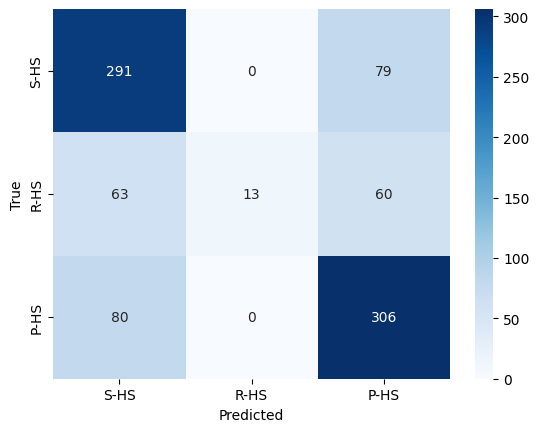


Fold 2
Accuracy: 0.6894618834080718
Precision: 0.7899913867355727
Recall: 0.5609666356389916
F1 Score: 0.5453219966377861
Confusion Matrix for fold 2:


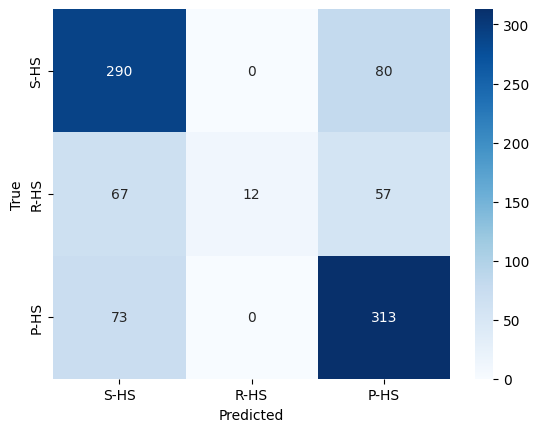


Fold 3
Accuracy: 0.6610549943883277
Precision: 0.7319875776397516
Recall: 0.5305299761182115
F1 Score: 0.5058049775791712
Confusion Matrix for fold 3:


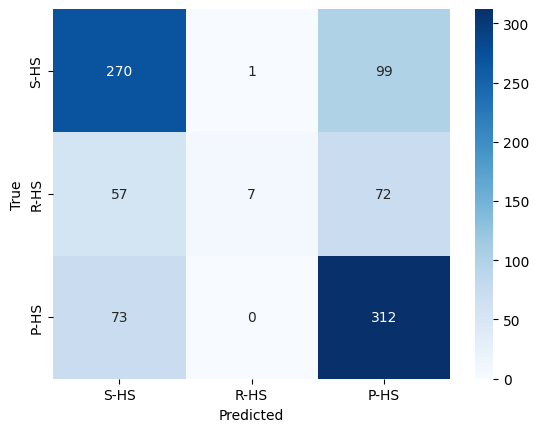


Fold 4
Accuracy: 0.6936026936026936
Precision: 0.7002632783882783
Recall: 0.5613689808034928
F1 Score: 0.5411658643010404
Confusion Matrix for fold 4:


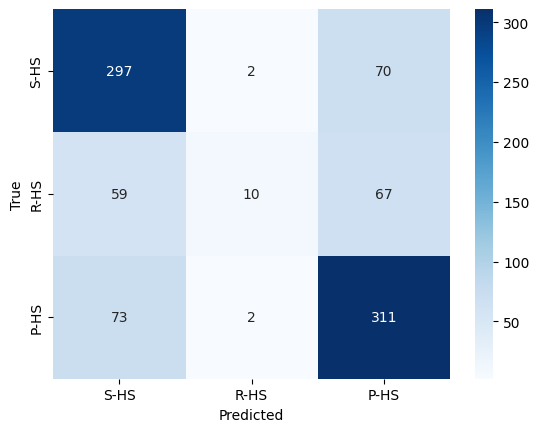


Fold 5
Accuracy: 0.6734006734006734
Precision: 0.7799698751208689
Recall: 0.5436009646848475
F1 Score: 0.522508537849199
Confusion Matrix for fold 5:


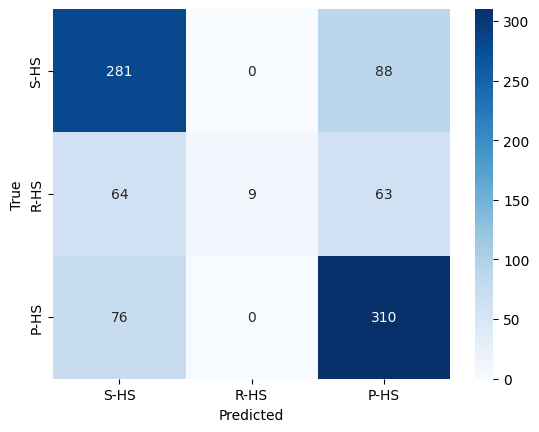


Mean Metrics Across All Folds:
Mean Accuracy: 0.6802753494083839
Mean Precision: 0.7576522477022676
Mean Recall: 0.5509480338337915
Mean F1 Score: 0.5319495642849755


In [28]:
# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)


# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)

scores = []
# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf, labels)):
    print(f'\nFold {fold + 1}')

    # Split the data
    X_train_tfidf, X_val_tfidf = X_tfidf[train_idx], X_tfidf[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]


    # Initialize and train the MultinomialNB model
    nb_model = MultinomialNB()
    nb_model.fit(X_train_tfidf, y_train)

    # Predict on the validation set
    y_pred = nb_model.predict(X_val_tfidf)


      # Evaluate the model
    y_pred = nb_model.predict(X_val_tfidf)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    scores.append((accuracy, precision, recall, f1))

     # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    print(f'Confusion Matrix for fold {fold + 1}:')
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['S-HS','R-HS', 'P-HS'], yticklabels=['S-HS','R-HS', 'P-HS'])
    # sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate and print the average scores across all folds
avg_scores = np.mean(np.array(scores), axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1_score = avg_scores
print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')


# **char ngrame **


Fold 1
Accuracy: 0.7399103139013453
Precision: 0.8043186413571742
Recall: 0.652659799390979
F1 Score: 0.6760961468314859
Confusion Matrix for fold 1:


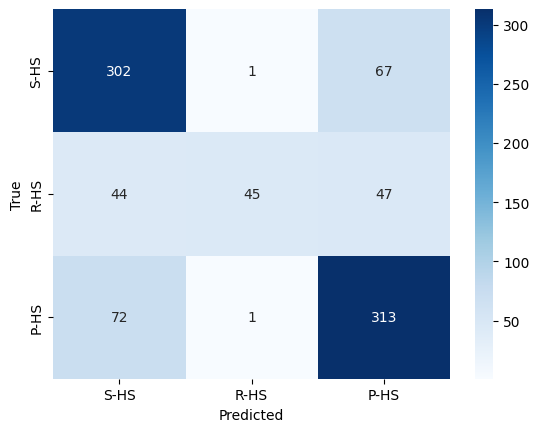


Fold 2
Accuracy: 0.7331838565022422
Precision: 0.7977281086857549
Recall: 0.6299421182840872
F1 Score: 0.6445489457949761
Confusion Matrix for fold 2:


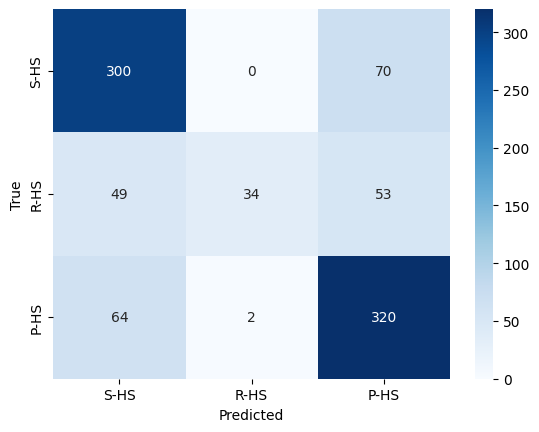


Fold 3
Accuracy: 0.7081930415263749
Precision: 0.7590724170691122
Recall: 0.6208248164130516
F1 Score: 0.6410403899618738
Confusion Matrix for fold 3:


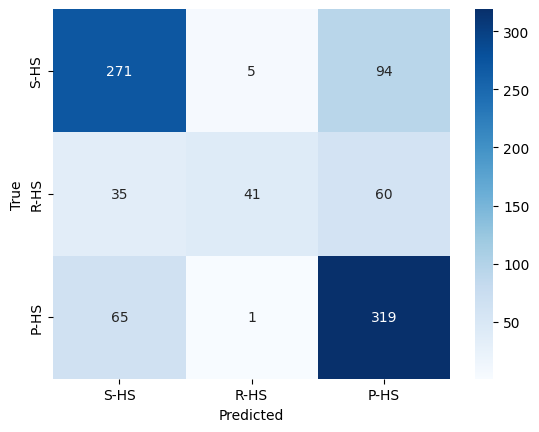


Fold 4
Accuracy: 0.7216610549943884
Precision: 0.757343937811029
Recall: 0.6220865074900875
F1 Score: 0.6364718755831592
Confusion Matrix for fold 4:


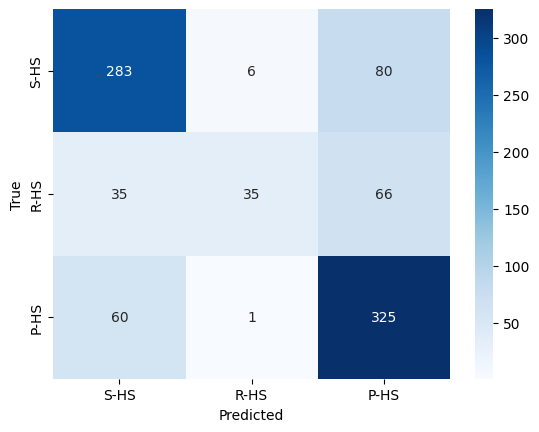


Fold 5
Accuracy: 0.7261503928170595
Precision: 0.7836116393494748
Recall: 0.6464159389130212
F1 Score: 0.6711551688353335
Confusion Matrix for fold 5:


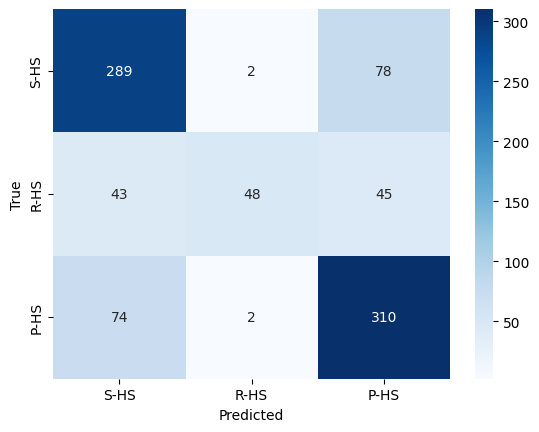


Mean Metrics Across All Folds:
Mean Accuracy: 0.725819731948282
Mean Precision: 0.780414948854509
Mean Recall: 0.6343858360982454
Mean F1 Score: 0.6538625054013656


In [29]:
# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
scores = []


# Vectorize the text data using Character N-grams
tfidf_vectorizer = TfidfVectorizer(analyzer='char', max_features=10000, ngram_range=(2, 6))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)


# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf, labels)):
    print(f'\nFold {fold + 1}')

    # Split the data
    X_train_tfidf, X_val_tfidf = X_tfidf[train_idx], X_tfidf[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the MultinomialNB model
    nb_model = MultinomialNB()
    nb_model.fit(X_train_tfidf, y_train)

    # Predict on the validation set
    y_pred = nb_model.predict(X_val_tfidf)

      # Evaluate the model
    y_pred = nb_model.predict(X_val_tfidf)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    scores.append((accuracy, precision, recall, f1))

    # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    print(f'Confusion Matrix for fold {fold + 1}:')
    # sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['S-HS','R-HS', 'P-HS'], yticklabels=['S-HS','R-HS', 'P-HS'])

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate and print the average scores across all folds
avg_scores = np.mean(np.array(scores), axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1_score = avg_scores
print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

**word/char n grame**


Fold 1
Accuracy: 0.7455156950672646
Precision: 0.7925511794312241
Recall: 0.6634766509880804
F1 Score: 0.687199417779839
Confusion Matrix for fold 1:


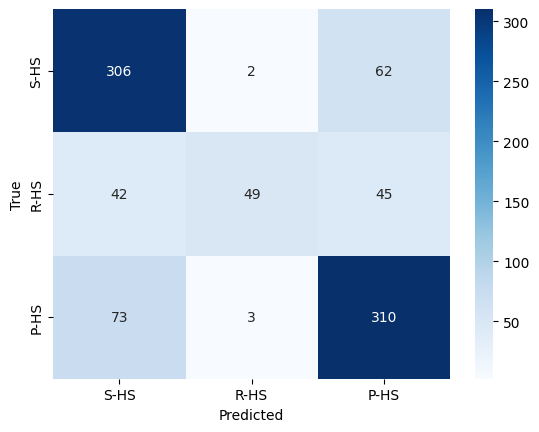


Fold 2
Accuracy: 0.7511210762331838
Precision: 0.7957122821471382
Recall: 0.6645075660848291
F1 Score: 0.68709138131773
Confusion Matrix for fold 2:


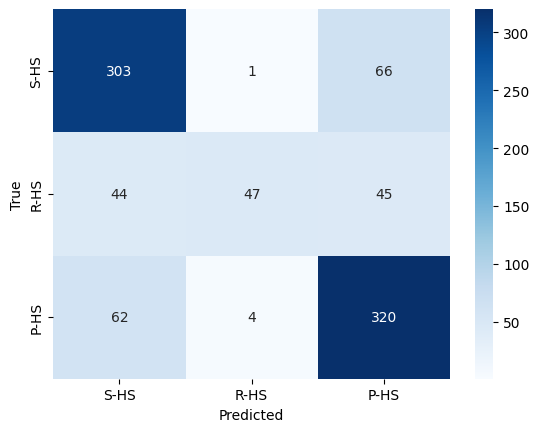


Fold 3
Accuracy: 0.7182940516273849
Precision: 0.7640656315643094
Recall: 0.6366131219072395
F1 Score: 0.6591217307589307
Confusion Matrix for fold 3:


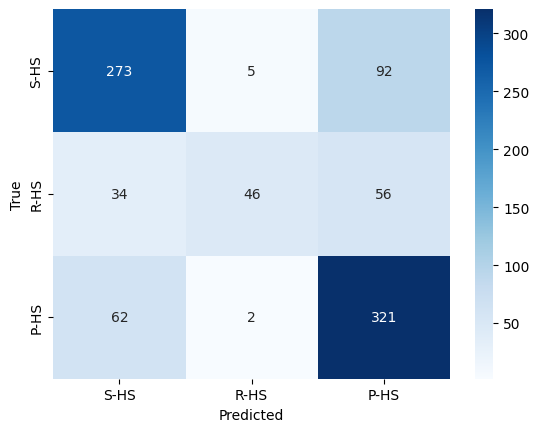


Fold 4
Accuracy: 0.7418630751964085
Precision: 0.7548848369731016
Recall: 0.6525141193705953
F1 Score: 0.6702243543703403
Confusion Matrix for fold 4:


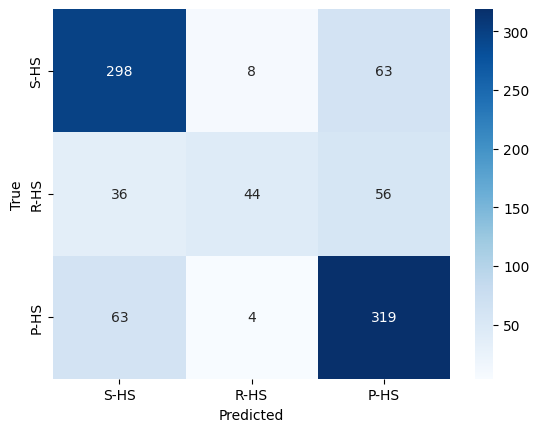


Fold 5
Accuracy: 0.7497194163860831
Precision: 0.7873689802261231
Recall: 0.6868143539202333
F1 Score: 0.713185643134974
Confusion Matrix for fold 5:


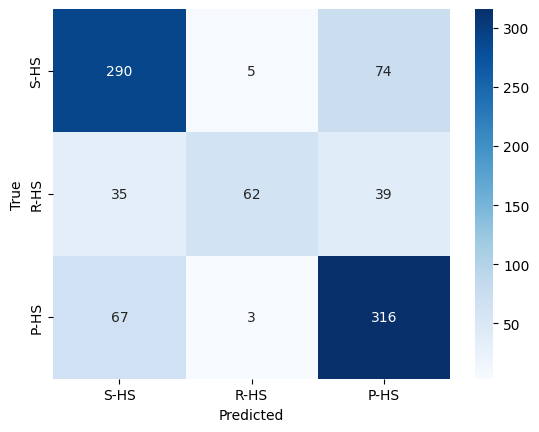


Mean Metrics Across All Folds:
Mean Accuracy: 0.741302662902065
Mean Precision: 0.7789165820683792
Mean Recall: 0.6607851624541955
Mean F1 Score: 0.6833645054723627


In [30]:
from scipy.sparse import hstack
tweets = df['Tweet'].values
labels =  df['sub_labels'].values

# Initialize TfidfVectorizer for Worض N-grams and Character N-grams
word_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
char_vectorizer = TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 6))

# Fit and transform the tweets using both vectorizers
X_word = word_vectorizer.fit_transform(tweets)
X_char = char_vectorizer.fit_transform(tweets)

# Combine the Word and Character N-grams features
X_combined = hstack([X_word, X_char])

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
# Initialize lists to store metrics for each fold
scores = []

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_combined, labels)):
    print(f'\nFold {fold + 1}')

    # Split the combined features for training and validation
    X_train, X_val = X_combined[train_idx], X_combined[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the MultinomialNB model
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = nb_model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    scores.append((accuracy, precision, recall, f1))

        # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    print(f'Confusion Matrix for fold {fold + 1}:')
    # sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['S-HS','R-HS', 'P-HS'], yticklabels=['S-HS','R-HS', 'P-HS'])

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate and print the average scores across all folds
avg_scores = np.mean(np.array(scores), axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1_score = avg_scores
print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')